In [174]:
import ReplayBuffer

In [175]:
import matplotlib.pyplot as plt
import matplotlib
import joblib
import os
import numpy as np
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import pandas as pd

In [176]:
rb_256 = joblib.load(f'../runs_256/train/ReplayBuffer_train.joblib')
rb_128 = joblib.load(f'../runs/train/ReplayBuffer_train.joblib')

In [177]:
r_128 = rb_128.reward[:rb_128.mem_size-1]
r_256 = rb_256.reward[:rb_128.mem_size-1]

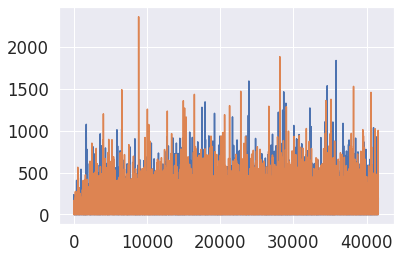

In [178]:
plt.plot(np.arange(rb_128.mem_size-1),r_128)
plt.plot(np.arange(rb_128.mem_size-1),r_256)

In [179]:
data_128 = pd.DataFrame({'reward':r_128.flatten(), 'epoch':np.arange(rb_128.mem_size-1)})
data_256 = pd.DataFrame({'reward':r_256.flatten(), 'epoch':np.arange(rb_128.mem_size-1)})

In [180]:
data_256['avg_reward'] = data_256.reward.rolling(1000).mean()
data_128['avg_reward'] = data_128.reward.rolling(1000).mean()

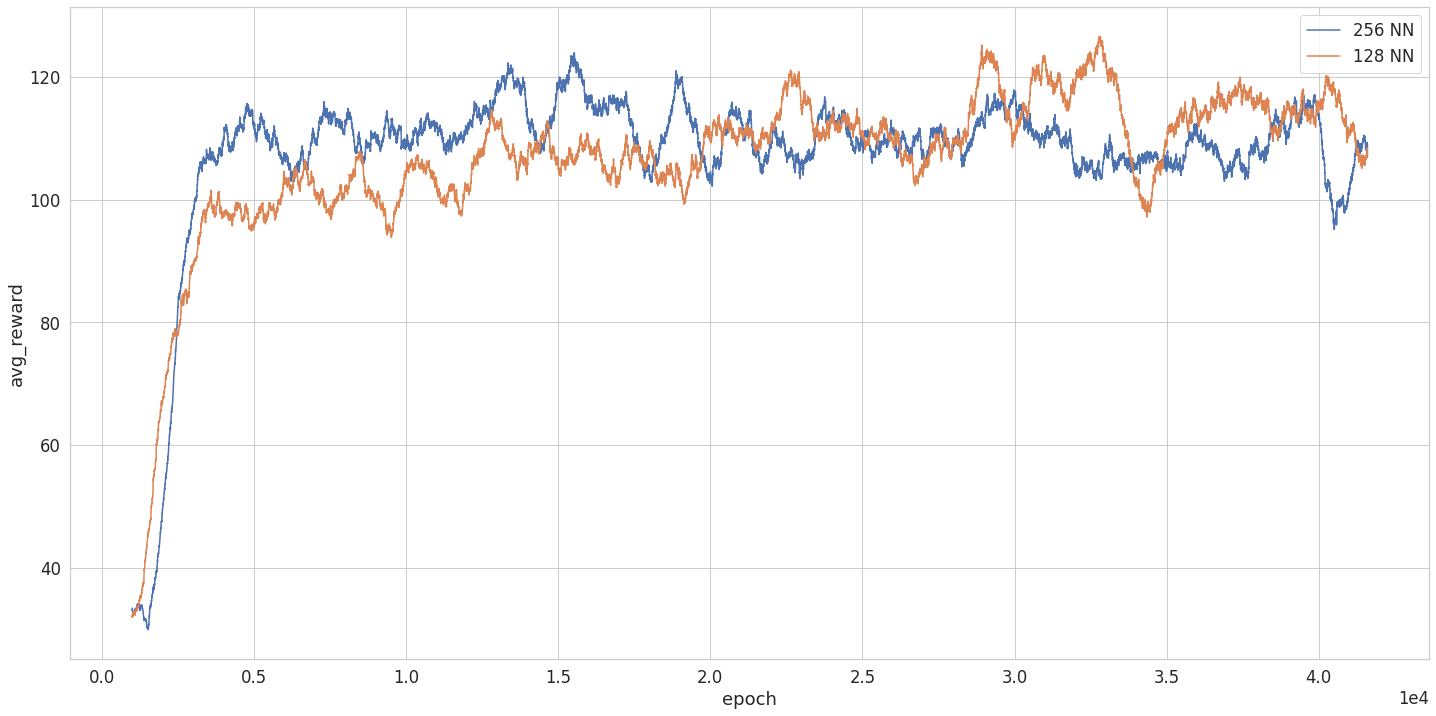

In [185]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", font_scale=1.5)
sns.lineplot(data=data_256, y='avg_reward', x='epoch', label="256 NN")
sns.lineplot(data=data_128, y='avg_reward', x='epoch', label="128 NN")
plt.legend(loc='best').set_draggable(True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join('nn_duel_rw.svg'), dpi=200)

In [188]:
data_256['max_reward'] = data_256.reward.rolling(100).max()
data_128['max_reward'] = data_128.reward.rolling(100).max()

data_256['avg_max_reward'] = data_256.max_reward.rolling(500).mean()
data_128['avg_max_reward'] = data_128.max_reward.rolling(500).mean()

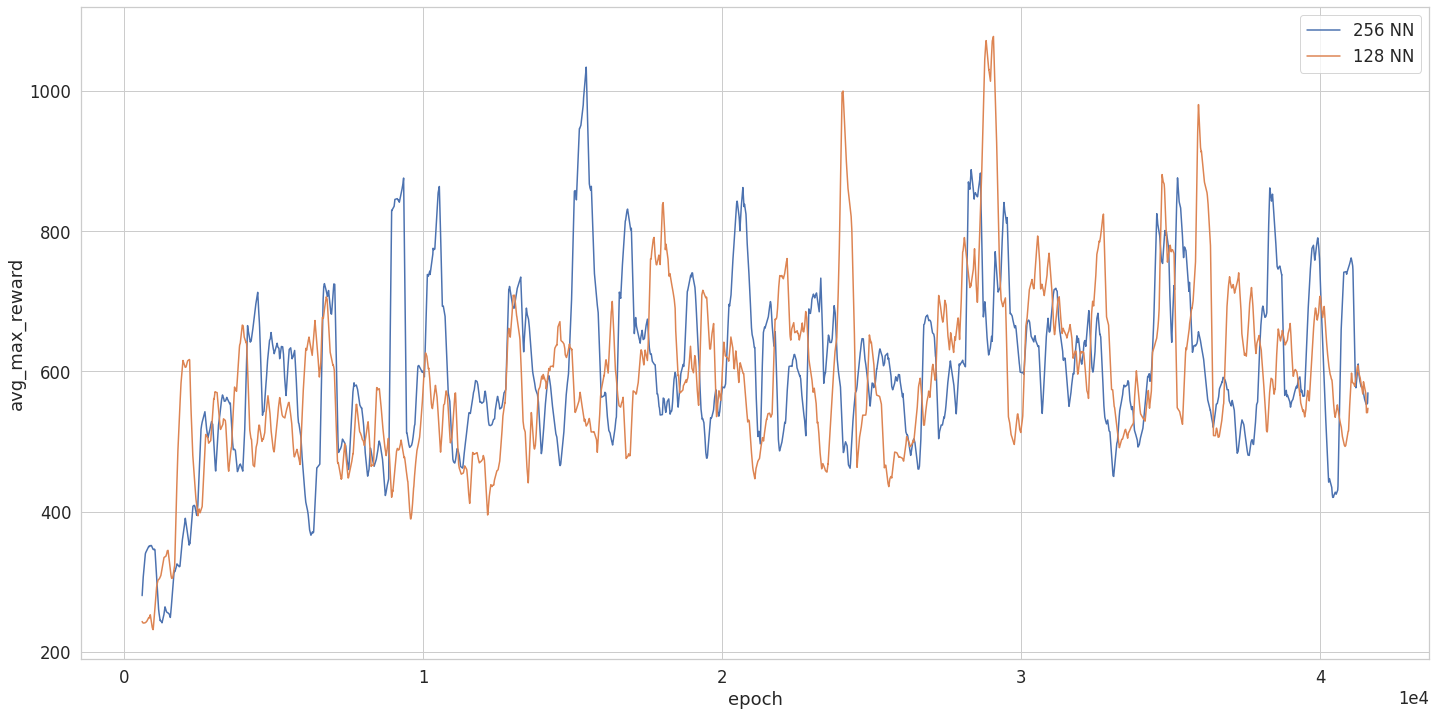

In [189]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", font_scale=1.5)
sns.lineplot(data=data_256, y='avg_max_reward', x='epoch', label="256 NN")
sns.lineplot(data=data_128, y='avg_max_reward', x='epoch', label="128 NN")
plt.legend(loc='best').set_draggable(True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join('nn_duel_max_rw.svg'), dpi=200)